<a href="https://colab.research.google.com/github/manishmcsa/CNN_EMNIST_Split_mnist_no_fc_model/blob/main/CNN_EMNIST_split_Balanced_NO_FC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#ibraries
import torch # Importing Pytorch library
import torch.nn as nn # import torch library for neyral nets
import torch.nn.functional as F # Importing torch library for performing arthmetic 
import torch.optim as optim  # implementing various optimization algorithms
import torchvision as torchvision
from torchvision import datasets, transforms # package consists of popular datasets, model architectures, and common image transformations for computer vision

In [2]:
#Building Neural Network

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=10, kernel_size=3) #input = 28*28*1  OUtput - 26*26*10        
        self.conv2 = nn.Conv2d(in_channels=10, out_channels=10, kernel_size=3) #input = 26*26*10  OUtput - 24*24*10   
        self.pool1 = nn.MaxPool2d(2, 2) #Input :24*24*10  Output : 12*12*10 Receptive field - 10*10                   
        self.conv3 = nn.Conv2d(in_channels=10, out_channels=20, kernel_size=3) #input = 12*12*10  OUtput - 10*10*20   
        self.conv4 = nn.Conv2d(in_channels=20, out_channels=20, kernel_size=3) #input = 10*10*20  OUtput - 8*8*20     
        self.pool2 = nn.MaxPool2d(2, 2) #Input : 8*8*20   Output: 4*4*20                                              
        self.conv5 = nn.Conv2d(in_channels=20, out_channels=30, kernel_size=3) #input = 4*4*20  OUtput - 2*2*30 
        self.pool3 = nn.AvgPool2d(2, 2) # Input: 2*2*30 Ouput:1*1*30 
        self.conv6 = nn.Conv2d(in_channels=30, out_channels=47, kernel_size=1) #input = 1*1*30  OUtput - 1*1*47

    def forward(self, x):
        x = self.pool1(F.relu(self.conv2(F.relu(self.conv1(x))))) # forward activation function using relu
        x = self.pool2(F.relu(self.conv4(F.relu(self.conv3(x))))) # forward activation function using relu
        x = self.pool3((F.relu(self.conv5(x)))) # forward activation function using relu
        x = self.conv6(x) # forward activation function using relu
        x = x.view(-1, 47) # reshape tensor for -1 is nu,mber of rows and 10 is column value i.e. predictions
        return F.log_softmax(x)

In [3]:
# undesratnding and printing the network structure and summary
!pip install torchsummary # package to print model summary
from torchsummary import summary # package to print model summary
use_cuda = torch.cuda.is_available() # toc check is GPU is available
device = torch.device("cuda" if use_cuda else "cpu") # enable device to GPU if available otherwise CPU
model=Net().to(device) #sending model to GPU
summary(model, input_size=(1, 28, 28)) # printing model summary

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 26, 26]             100
            Conv2d-2           [-1, 10, 24, 24]             910
         MaxPool2d-3           [-1, 10, 12, 12]               0
            Conv2d-4           [-1, 20, 10, 10]           1,820
            Conv2d-5             [-1, 20, 8, 8]           3,620
         MaxPool2d-6             [-1, 20, 4, 4]               0
            Conv2d-7             [-1, 30, 2, 2]           5,430
         AvgPool2d-8             [-1, 30, 1, 1]               0
            Conv2d-9             [-1, 47, 1, 1]           1,457
Total params: 13,337
Trainable params: 13,337
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.14
Params size (MB): 0.05
Estimated Total Size (MB): 0.19
---------------------------------------------

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


In [4]:
#torch.manual_seed(1)
batch_size = 256 # initializing batch size

kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {} # defining data dictionary of specified arguments
# Download Trainset

train_loader = torch.utils.data.DataLoader(                 # downloading the train dataset
    datasets.EMNIST('../data', train=True, download=True,split='balanced',
    transform=transforms.Compose([
                                 transforms.ToTensor()
    ])
                    ),
    batch_size=batch_size, shuffle=True, **kwargs)

Extracting ../data/EMNIST/raw/emnist.zip to ../data/EMNIST/raw
Processing byclass


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Processing bymerge
Processing balanced
Processing letters
Processing digits
Processing mnist
Done!


In [5]:
batch = next(iter(train_loader)) # defining the itererator to get 1batch of image sequentially
images,labels=batch              # mapping imgaes and labels in batch
labels.shape,images.shape

(torch.Size([256]), torch.Size([256, 1, 28, 28]))

labels: tensor([ 7, 30,  6, 23, 38, 42, 41, 37, 20,  0,  1, 17, 45, 40, 40,  6, 38, 11,
        20, 25, 27, 11,  3, 10, 37,  4,  8, 33, 10, 40, 30,  4,  1, 41, 17, 45,
        39, 19, 22, 25,  1,  1, 36, 19, 39, 45, 21, 32,  1, 11, 39, 41, 11,  9,
        45,  1, 21, 26, 44, 34, 10, 42, 22, 30,  3, 14, 18, 34, 30,  5,  5, 38,
        43, 21,  0, 34, 39, 24, 20, 42, 38,  9, 35, 42,  5, 42,  6, 43, 34, 45,
        23, 22, 18, 37,  3, 18, 33, 36, 42, 33, 25,  2, 14, 27, 14,  8, 21, 20,
         5, 11, 23,  6, 25, 12, 35, 28, 12, 22,  8, 45, 16, 10, 17, 13, 18,  6,
        33, 37,  2,  1, 27, 14, 32, 33,  2, 39,  5, 44, 25, 31, 39,  1, 11,  6,
        27, 20,  2, 45, 28, 14, 24,  4, 10, 42, 15, 16, 30, 21, 43, 11,  6, 28,
        21,  4, 11, 41, 36, 14, 16, 25,  0, 35, 42, 13, 22, 10, 30, 23, 14, 33,
         6,  1,  9,  0, 45, 14, 28, 36, 13, 26, 10, 22, 33, 21, 28, 19, 40, 37,
        31, 40, 15, 25,  5,  9, 33,  9, 35, 24,  1, 21, 17, 23, 22, 42, 41, 45,
        30, 42, 29, 32, 17, 40, 

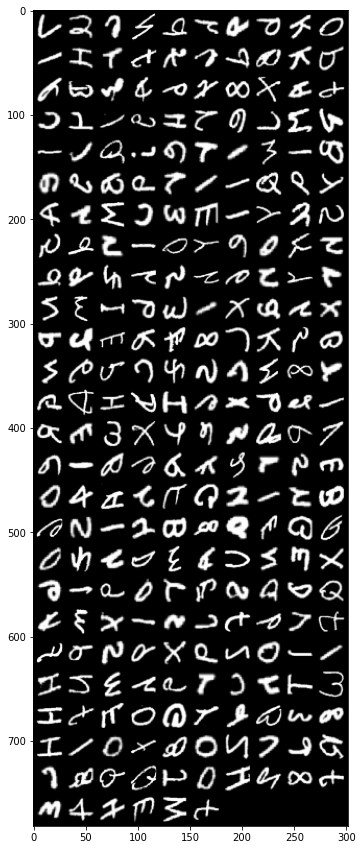

In [6]:
import matplotlib.pyplot as plt    #importing library to plot
import numpy as np                 # importing numpy library
grid = torchvision.utils.make_grid(images, nrow=10) # making grid of images with 10 rows
plt.figure(figsize=(15,15)) # dfeining the size of image to plot
plt.imshow(np.transpose(grid, (1,2,0))) # plot/how the image
print('labels:', labels) # printing the labels

In [7]:
# getting the number of correct prediction w.r.t to labels
def get_num_correct(preds, labels):
  return preds.argmax(dim=1).eq(labels).sum().item() # pred.argmax will give value of highest prob of value predicted and compares with labels, 
                                                     # sum will keep adding the correct values and item will give the result of sum

In [8]:
#train_loader = torch.utils.data.DataLoader(train_loader, batch_size=batch_size)
network=Net()           # creating object of Network class
optimizer = optim.Adam(network.parameters(), lr=0.01) #initializing optimizer

for epoch in range(20): # loopng epoches

    total_loss = 0                      #Initializing variable to calculate total loss
    total_correct = 0                   #Initializing variable to calculate total correct

    for batch in train_loader: # Get Batch
        images, labels = batch 
        images,labels=images.to(device),labels.to(device) # mapping image and labels data to GPU
        preds = network(images) # Pass Batch
        loss = F.cross_entropy(preds, labels) # Calculate Loss

        optimizer.zero_grad()  #zero_grad() is to restart looping without losses from last step during training model 
        loss.backward() # Calculate Gradients
        optimizer.step() # Update Weights

        total_loss += loss.item() # calculate total loss in an epoch
        total_correct += get_num_correct(preds, labels)  #calculate total correct in an epoch training
        acuracy=total_correct/131600

    print(                                          #printing epochwise total loss and total correct w.r.t labels
        "epoch", epoch, 
        "total_correct:", total_correct, 
        "loss:", total_loss,
        "Accuracy", acuracy
    )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


epoch 0 total_correct: 70931 loss: 545.6829415559769 Accuracy 0.5389893617021276
epoch 1 total_correct: 89382 loss: 276.6276296079159 Accuracy 0.6791945288753799
epoch 2 total_correct: 91706 loss: 244.77599442005157 Accuracy 0.6968541033434651
epoch 3 total_correct: 93029 loss: 228.7530931532383 Accuracy 0.7069072948328268
epoch 4 total_correct: 93854 loss: 218.3305795788765 Accuracy 0.7131762917933131
epoch 5 total_correct: 94088 loss: 213.1479627788067 Accuracy 0.7149544072948328
epoch 6 total_correct: 94461 loss: 209.24752071499825 Accuracy 0.7177887537993921
epoch 7 total_correct: 94887 loss: 205.2451994717121 Accuracy 0.7210258358662613
epoch 8 total_correct: 94901 loss: 204.5769239962101 Accuracy 0.7211322188449848
epoch 9 total_correct: 95159 loss: 200.42005494236946 Accuracy 0.7230927051671733
epoch 10 total_correct: 95000 loss: 202.48195633292198 Accuracy 0.7218844984802432
epoch 11 total_correct: 95162 loss: 200.4643417596817 Accuracy 0.7231155015197568
epoch 12 total_correct